In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import sympy as sp

In [2]:
import math
radius = np.array([22.6,18.6,16.3,15,14.1,13,12.5,12,11.8,11.7,11.6,11.6,11.6,11.7,11.8])
time = np.array([0,5,10,15,20,30,40,50,60,70,80,90,100,110,120])
theta = np.array([110.5,100,91,83.7,77.7,67.7,58.6,52,45,38.5,32.8,27,21.6,16.8,12])*np.pi/180


Loss of radius polynomial fit:  0.010437404757692382


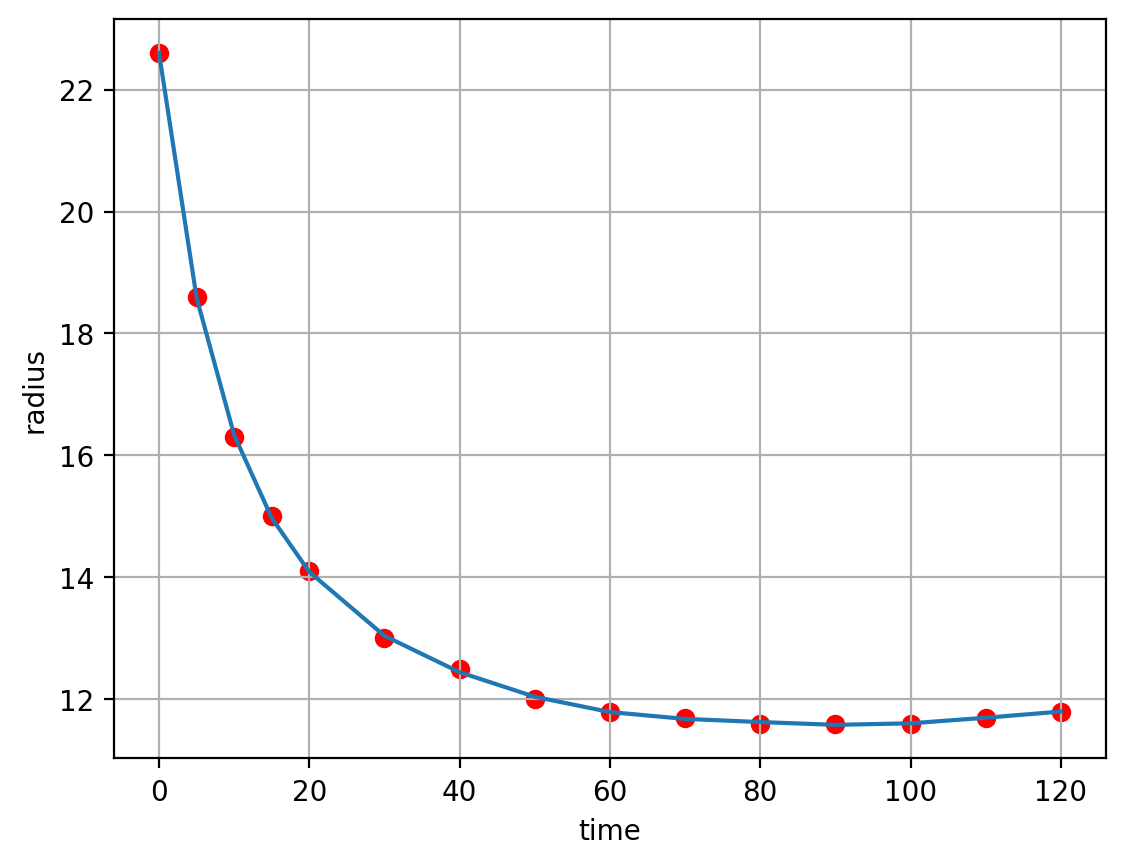

In [3]:
c_r_t = np.polyfit(time, radius, 10)    #coefficients of the polynomial_radius
c_theta_t = np.polyfit(time, theta, 10) #coefficients of the polynomial_theta
r_t = np.poly1d(c_r_t)                  #polynomial function of radius
theta_t = np.poly1d(c_theta_t)          #polynomial function of theta
t = sp.symbols('t')                     #wrt time

#calcultaing the dr_dt, dtheta_dt, d2r_dt2, d2theta_dt2, a_er, a_et, a(net acceleration)

r_t_expression= sum(coef * t**i for i, coef in enumerate(c_r_t[::-1]))
theta_t_expression= sum(coef * t**i for i, coef in enumerate(c_theta_t[::-1]))
dr_dt= sp.diff(r_t_expression, t)
dtheta_dt= sp.diff(theta_t_expression, t)
d2r_dt2= sp.diff(dr_dt, t)
d2theta_dt2= sp.diff(dtheta_dt, t)
a_er= d2r_dt2 - (r_t_expression * sp.expand(dtheta_dt**2))
a_et= r_t_expression * d2theta_dt2 + 2 * dr_dt * dtheta_dt
a= sp.sqrt(a_er**2 + a_et**2)

# plotting the radius and time
plt.scatter(time, radius,color = "red")
plt.plot(time, r_t(time), label='Polynomial fit')
plt.grid("on")
plt.xlabel("time")
plt.ylabel("radius")
loss_r = np.sum((radius - r_t(time))**2)
print("Loss of radius polynomial fit: ", loss_r)

Loss of theta polynomial fit:  9.280268304141562e-05


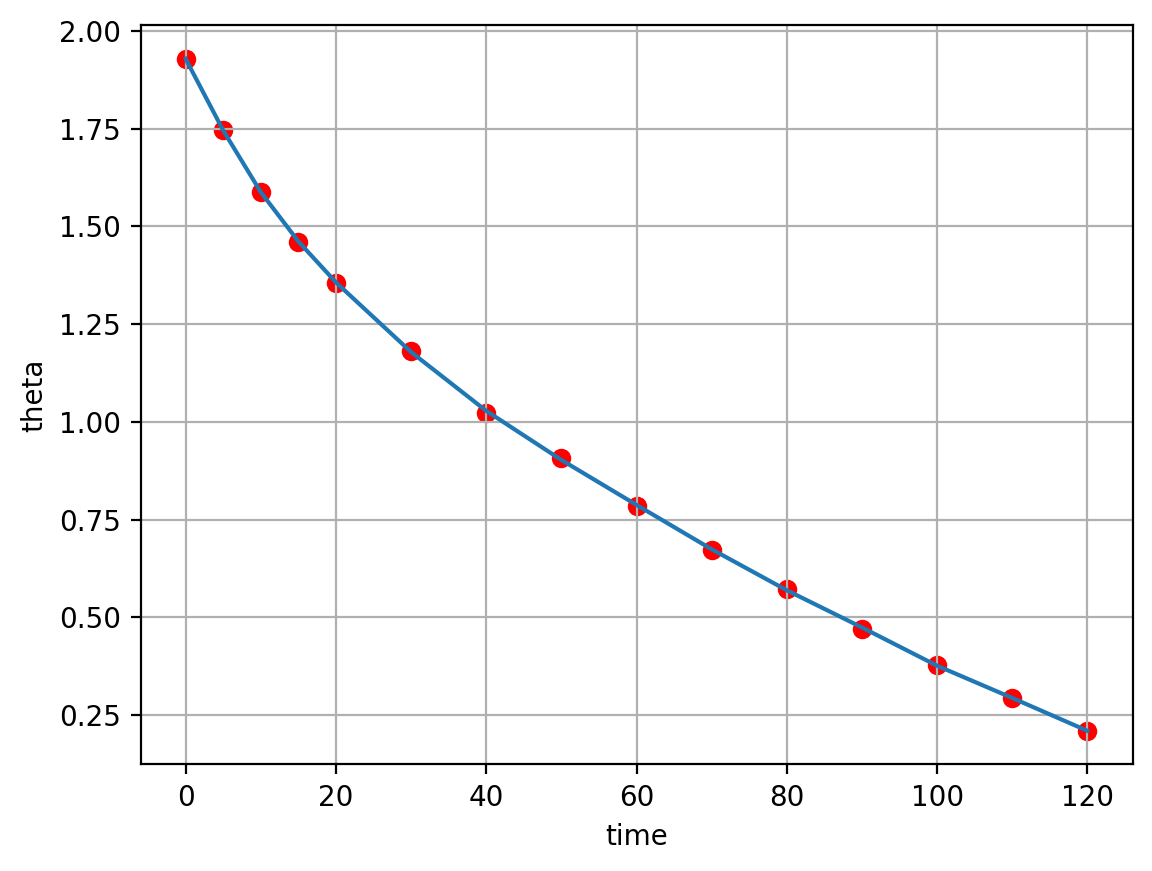

In [4]:
#plotting the theta and time
plt.scatter(time, theta,color = "red")
plt.plot(time, theta_t(time), label='Polynomial fit')
plt.grid("on")
plt.xlabel("time")
plt.ylabel("theta")
loss_theta = np.sum((theta - theta_t(time))**2)
print("Loss of theta polynomial fit: ", loss_theta)

In [5]:
dr_dt

1.75819519000369e-16*t**9 - 9.76138719643645e-14*t**8 + 2.30509304888673e-11*t**7 - 3.03139300727513e-9*t**6 + 2.44788663731983e-7*t**5 - 1.26772101103367e-5*t**4 + 0.000429600287719453*t**3 - 0.00957525463374402*t**2 + 0.136918524955325*t - 1.07792187336812

In [6]:
dtheta_dt

-3.26007703835793e-17*t**9 + 1.71500866817518e-14*t**8 - 3.78748683229673e-12*t**7 + 4.55944831883717e-10*t**6 - 3.24860927284179e-8*t**5 + 1.38945460991755e-6*t**4 - 3.42944016353014e-5*t**3 + 0.000424869820974844*t**2 - 0.00108325752454352*t - 0.0365662418528163

In [7]:
print("r at t = 40  ",r_t(40),"mi")

dr_dt_40 = dr_dt.subs(t, 40)
print("dr_dt at t = 40  ",dr_dt.subs(t,40),"mi/sec")

dtheat_dt_40 = dtheta_dt.subs(t, 40)
print("dtheta_dt at t = 40  ",dtheat_dt_40,"rad/sec")

velocity_ = math.sqrt(dr_dt_40**2 + (r_t(40)*dtheat_dt_40)**2)
print("velocity at t = 40  ",velocity_, "mi/sec")


r at t = 40   12.444689684269246 mi
dr_dt at t = 40   -0.0480221372270877 mi/sec
dtheta_dt at t = 40   -0.0136617274168573 rad/sec
velocity at t = 40   0.17666791368224316 mi/sec


In [8]:
d2r_dt2

1.58237567100332e-15*t**8 - 7.80910975714916e-13*t**7 + 1.61356513422071e-10*t**6 - 1.81883580436508e-8*t**5 + 1.22394331865991e-6*t**4 - 5.07088404413467e-5*t**3 + 0.00128880086315836*t**2 - 0.019150509267488*t + 0.136918524955325

In [9]:
d2theta_dt2


-2.93406933452214e-16*t**8 + 1.37200693454014e-13*t**7 - 2.65124078260771e-11*t**6 + 2.7356689913023e-9*t**5 - 1.62430463642089e-7*t**4 + 5.5578184396702e-6*t**3 - 0.000102883204905904*t**2 + 0.000849739641949687*t - 0.00108325752454352

In [10]:
a_er

1.58237567100332e-15*t**8 - 7.80910975714916e-13*t**7 + 1.61356513422071e-10*t**6 - 1.81883580436508e-8*t**5 + 1.22394331865991e-6*t**4 - 5.07088404413467e-5*t**3 + 0.00128880086315836*t**2 - 0.019150509267488*t - (1.75819519000369e-17*t**10 - 1.08459857738183e-14*t**9 + 2.88136631110842e-12*t**8 - 4.33056143896447e-10*t**7 + 4.07981106219972e-8*t**6 - 2.53544202206734e-6*t**5 + 0.000107400071929863*t**4 - 0.00319175154458134*t**3 + 0.0684592624776627*t**2 - 1.07792187336812*t + 22.6023076457342)*(1.06281022960286e-33*t**18 - 1.11821207594054e-30*t**17 + 5.41075450292672e-28*t**16 - 1.59639760503406e-25*t**15 + 3.21021865820238e-23*t**14 - 4.6586432879069e-21*t**13 + 5.03861568431979e-19*t**12 - 4.13528203419496e-17*t**11 + 2.5967984456236e-15*t**10 - 1.24801762426084e-13*t**9 + 4.55315215318041e-12*t**8 - 1.23616572717238e-10*t**7 + 2.3938178770538e-9*t**6 - 2.97757982417488e-8*t**5 + 1.53199435398e-7*t**4 + 1.58754790774318e-6*t**3 - 2.98983383949776e-5*t**2 + 7.92213132626832e-5*t +

In [11]:
a_et

(-2.93406933452214e-16*t**8 + 1.37200693454014e-13*t**7 - 2.65124078260771e-11*t**6 + 2.7356689913023e-9*t**5 - 1.62430463642089e-7*t**4 + 5.5578184396702e-6*t**3 - 0.000102883204905904*t**2 + 0.000849739641949687*t - 0.00108325752454352)*(1.75819519000369e-17*t**10 - 1.08459857738183e-14*t**9 + 2.88136631110842e-12*t**8 - 4.33056143896447e-10*t**7 + 4.07981106219972e-8*t**6 - 2.53544202206734e-6*t**5 + 0.000107400071929863*t**4 - 0.00319175154458134*t**3 + 0.0684592624776627*t**2 - 1.07792187336812*t + 22.6023076457342) + (-3.26007703835793e-17*t**9 + 1.71500866817518e-14*t**8 - 3.78748683229673e-12*t**7 + 4.55944831883717e-10*t**6 - 3.24860927284179e-8*t**5 + 1.38945460991755e-6*t**4 - 3.42944016353014e-5*t**3 + 0.000424869820974844*t**2 - 0.00108325752454352*t - 0.0365662418528163)*(3.51639038000738e-16*t**9 - 1.95227743928729e-13*t**8 + 4.61018609777347e-11*t**7 - 6.06278601455025e-9*t**6 + 4.89577327463966e-7*t**5 - 2.53544202206734e-5*t**4 + 0.000859200575438906*t**3 - 0.01915050

In [12]:
a

sqrt(((-2.93406933452214e-16*t**8 + 1.37200693454014e-13*t**7 - 2.65124078260771e-11*t**6 + 2.7356689913023e-9*t**5 - 1.62430463642089e-7*t**4 + 5.5578184396702e-6*t**3 - 0.000102883204905904*t**2 + 0.000849739641949687*t - 0.00108325752454352)*(1.75819519000369e-17*t**10 - 1.08459857738183e-14*t**9 + 2.88136631110842e-12*t**8 - 4.33056143896447e-10*t**7 + 4.07981106219972e-8*t**6 - 2.53544202206734e-6*t**5 + 0.000107400071929863*t**4 - 0.00319175154458134*t**3 + 0.0684592624776627*t**2 - 1.07792187336812*t + 22.6023076457342) + (-3.26007703835793e-17*t**9 + 1.71500866817518e-14*t**8 - 3.78748683229673e-12*t**7 + 4.55944831883717e-10*t**6 - 3.24860927284179e-8*t**5 + 1.38945460991755e-6*t**4 - 3.42944016353014e-5*t**3 + 0.000424869820974844*t**2 - 0.00108325752454352*t - 0.0365662418528163)*(3.51639038000738e-16*t**9 - 1.95227743928729e-13*t**8 + 4.61018609777347e-11*t**7 - 6.06278601455025e-9*t**6 + 4.89577327463966e-7*t**5 - 2.53544202206734e-5*t**4 + 0.000859200575438906*t**3 - 0.01

In [13]:
a_40 = a.subs(t, 40)
print("acceleration at t = 40  ",a_40,"mi/sec^2")


acceleration at t = 40   0.00464836207792239 mi/sec^2
